<a href="https://colab.research.google.com/github/Baberbaba/Linear-Regression-Model/blob/main/LRIS_N1_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Exploratory Data Analysis
In this section, we will:
- Import necessary packages for executing the code
- Load the data
- Summarize the features in the data using descriptive statistics
- Study the features in the data set and their interrelationships using various visualizations

In [1]:
# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load the data and take a look at it
df = pd.read_csv('/content/kool_karma_data.csv', index_col = 'District')
df.head()

,ADVT,INCOME,SALES
District,,,
1,9.5,39.0,145.1
2,10.1,50.5,128.3
3,9.4,55.6,121.3
4,11.6,45.0,134.4
5,10.3,49.6,106.5


The features *ADVT*, *INCOME* and *SALES* are shown in units of thousands of dollars. Note that the target variable here is *SALES* whereas the *ADVT* and *INCOME* variables are treated as predictors.

In [3]:
# Look at the specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 1 to 25
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ADVT    25 non-null     float64
 1   INCOME  25 non-null     float64
 2   SALES   25 non-null     float64
dtypes: float64(3)
memory usage: 800.0 bytes


In [4]:
# Summarize the features in the data set using descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ADVT,25.0,10.156,1.08054,8.4,9.4,10.1,11.2,11.9
INCOME,25.0,49.400,9.74517,33.0,42.4,47.5,55.6,68.1
SALES,25.0,128.296,16.36886,88.5,121.3,128.3,137.0,159.3


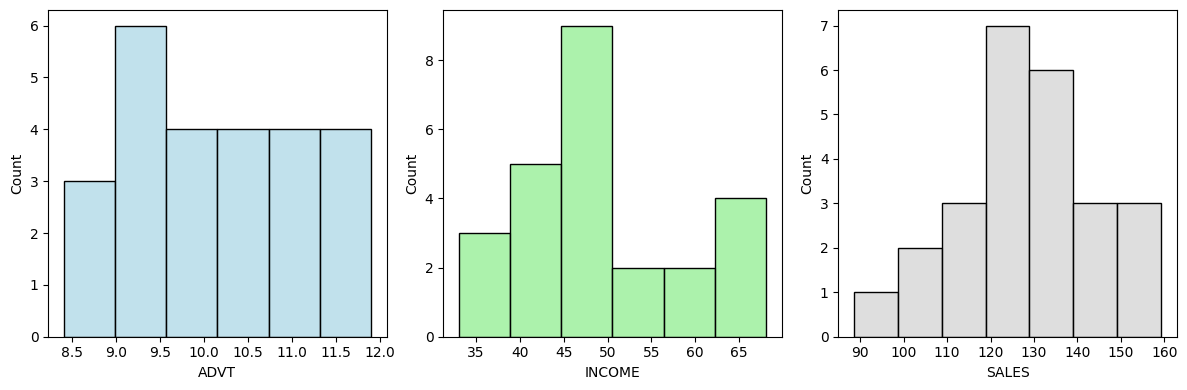

In [5]:
# Create histograms for the variables 'ADVT', 'INCOME' and 'SALES'
plt.figure(figsize = (12, 4))
plt.subplot(1, 3, 1)
sns.histplot(data = df, x = 'ADVT', color = 'lightblue')
plt.subplot(1, 3, 2)
sns.histplot(data = df, x = 'INCOME', color = 'lightgreen')
plt.subplot(1, 3, 3)
sns.histplot(data = df, x = 'SALES', color = 'lightgray')

plt.tight_layout();

The distribution of *SALES* (the dependent variable) looks somewhat normal.

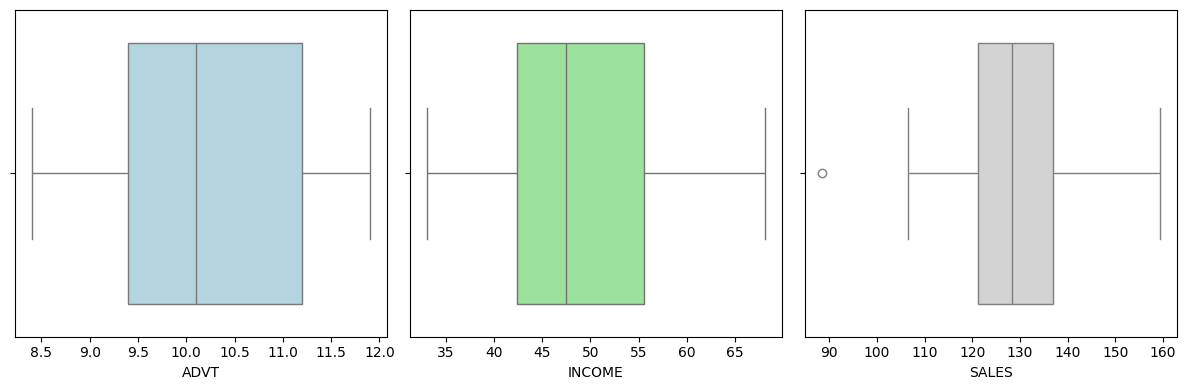

In [6]:
# Create box plots for the variables 'ADVT', 'INCOME' and 'SALES'
plt.figure(figsize = (12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(data = df, x = 'ADVT', color = 'lightblue')
plt.subplot(1, 3, 2)
sns.boxplot(data = df, x = 'INCOME', color = 'lightgreen')
plt.subplot(1, 3, 3)
sns.boxplot(data = df, x = 'SALES', color = 'lightgray')

plt.tight_layout();

The box plot of *SALES* also shows that the values are somewhat symmetrically distributed about the median value, whereas there is some skew in the box plots of *ADVT* and *INCOME*.

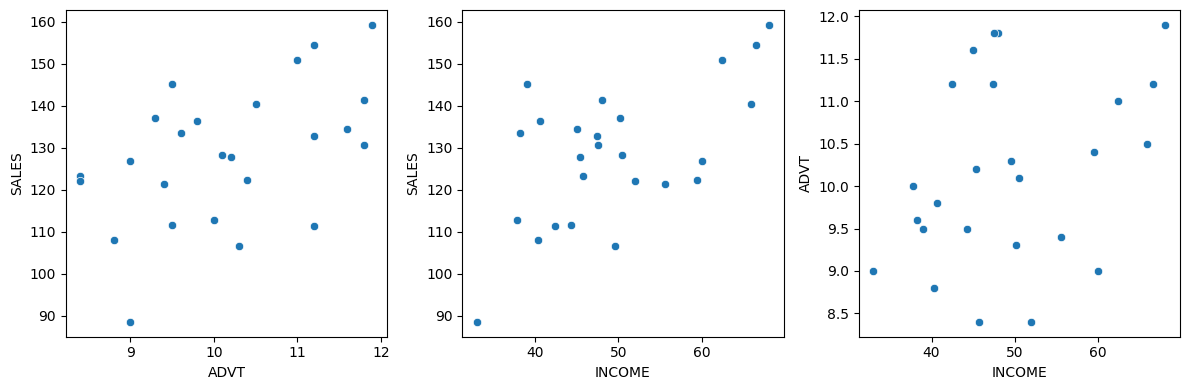

In [7]:
# Create scatter plots for 'ADVT' versus 'SALES', 'INCOME' versus 'SALES' and 'INCOME' versus 'ADVT'
plt.figure(figsize = (12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(data = df, x = 'ADVT', y = 'SALES')
plt.subplot(1, 3, 2)
sns.scatterplot(data = df, x = 'INCOME', y = 'SALES')
plt.subplot(1, 3, 3)
sns.scatterplot(data = df, x = 'INCOME', y = 'ADVT')

plt.tight_layout();

There appears to be greater advertising in districts with greater income.

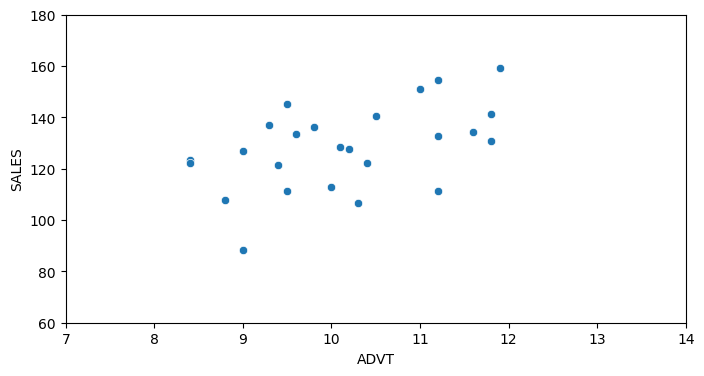

In [8]:
# Create a scatter plot of 'ADVT' versus 'SALES'
plt.figure(figsize = (8, 4))
sns.scatterplot(data = df, x = 'ADVT', y = 'SALES')
plt.xlim((7, 14))
plt.ylim((60, 180));

The scatter plot between *ADVT* and *SALES* shows a generally positive correlation between the two variables.

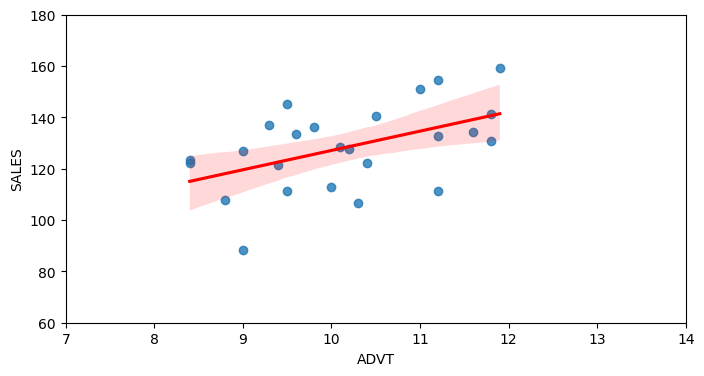

In [9]:
# Create a scatter plot of 'ADVT' versus 'SALES' and show the regression line
plt.figure(figsize = (8, 4))
sns.regplot(data = df, x = 'ADVT', y = 'SALES', line_kws = {'color': 'red'})
plt.xlim((7, 14))
plt.ylim((60, 180));

Note the simple linear regression line that has been fit to the data points.

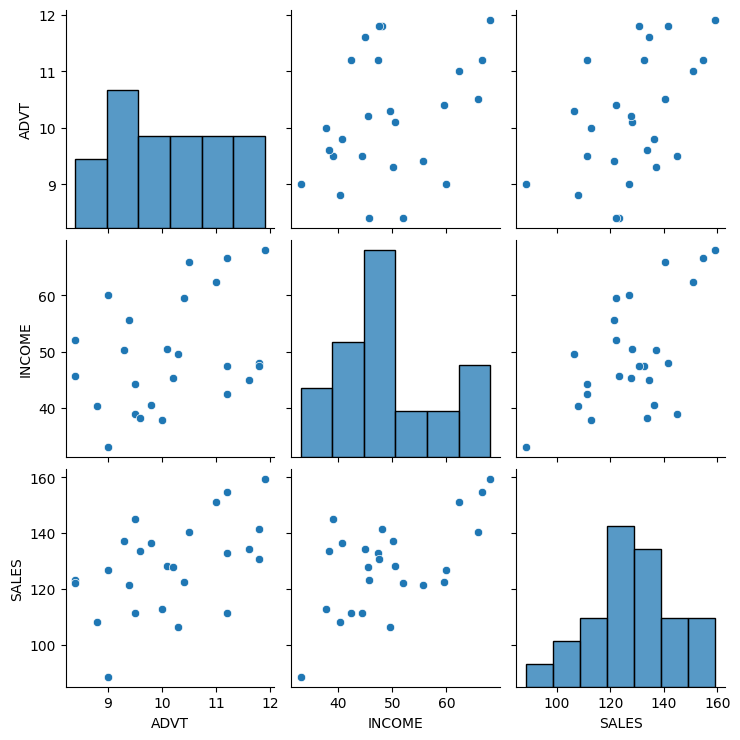

In [10]:
# Create a pair plot for the data
sns.pairplot(df);

Pair plots are useful in viewing a summary of all the numerical variables in a data set at a glance.

In [11]:
# Compute the correlation matrix for the data set
np.round(df.corr(), 2)

,ADVT,INCOME,SALES
ADVT,1.00,0.34,0.50
INCOME,0.34,1.00,0.59
SALES,0.50,0.59,1.00


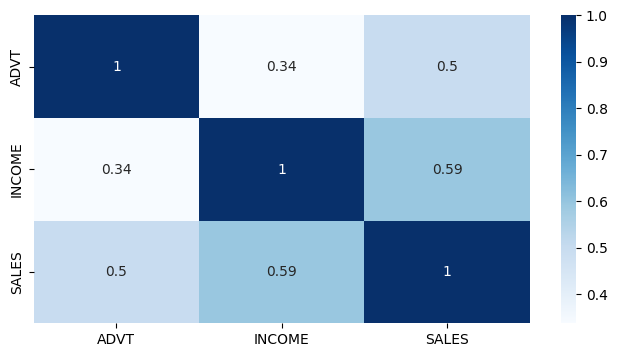

In [12]:
# Create a heatmap of the data set to study the correlation between the features
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues');

The correlation matrix shows that all the features in data set are positively correlated with each other.

# Part 2 - Simple Linear Regression
In this section, we will:
- Import necessary packages for executing the code
- Train and evaluate simple linear regression models for the data

In [13]:
# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf

## Model 1

In [14]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'SALES' using 'ADVT'
lr_model_1 = smf.ols('SALES~ADVT',data=df)
lr_model_1 = lr_model_1.fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     7.540
Date:                Fri, 14 Jun 2024   Prob (F-statistic):             0.0115
Time:                        08:14:12   Log-Likelihood:                -101.30
No. Observations:                  25   AIC:                             206.6
Df Residuals:                      23   BIC:                             209.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.8492     27.990      1.852      0.0

The summary shows relevant metrics and values related to the regression model such as the coefficients, the standard error, goodness of fit measures, measures of significance, and so on.

According to this model:
- A unit increase in *ADVT* leads to an increase of about 7.5 units in *SALES* on average
- The p-value for *ADVT* here is less than 0.05, so *ADVT* is statistically significant in explaining the variation in *SALES*
- About 25% of the variation in *SALES* is explained by *ADVT*

In [15]:
# Compute the residual standard error
rse_1 = np.sqrt(np.sum(lr_model_1.resid**2)/lr_model_1.df_resid)
print(np.round(rse_1, 2))

14.51


The smaller the residual standard error is, the more tightly clustered the data points are about the regression line. It is also useful in detecting outliers in the data set.

## Model 2

In [16]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'SALES' using 'INCOME'
lr_model_2 = smf.ols('SALES~INCOME',data=df)
lr_model_2 = lr_model_2.fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     12.54
Date:                Fri, 14 Jun 2024   Prob (F-statistic):            0.00175
Time:                        08:14:12   Log-Likelihood:                -99.409
No. Observations:                  25   AIC:                             202.8
Df Residuals:                      23   BIC:                             205.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.0115     14.177      5.573      0.0

According to this model:
- A unit increase in *INCOME* leads to an increase of about 1 unit in *SALES* on average
- The p-value for *INCOME* here is less than 0.05, so *INCOME* is statistically significant in explaining the variation in *SALES*
- About 35% of the variation in *SALES* is explained by *INCOME*

In [17]:
# Compute the residual standard error
rse_2 =np.sqrt(np.sum(lr_model_2.resid**2)/lr_model_2.df_resid)
print(np.round(rse_2, 2))

13.45


# Part 3 - Multiple Linear Regression
In this section, we will train and evaluate a multiple linear regression model for the data.

## Model 3

In [20]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'SALES' using 'ADVT' and 'INCOME'
lr_model_3 = smf.ols('SALES~ADVT+INCOME',data=df)
lr_model_3 = lr_model_3.fit()
print(lr_model_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     9.074
Date:                Fri, 14 Jun 2024   Prob (F-statistic):            0.00134
Time:                        08:32:37   Log-Likelihood:                -97.329
No. Observations:                  25   AIC:                             200.7
Df Residuals:                      22   BIC:                             204.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8948     24.963      1.478      0.1

According to this model:
- A unit increase in *ADVT* leads to an increase of about 5 units in *SALES* on average if *INCOME* is held constant
- A unit increase in *INCOME* leads to an increase of about 0.8 units in *SALES* on average if *ADVT* is held constant
- The p-value for *INCOME* here is less than 0.05, so *INCOME* is statistically significant in explaining the variation in *SALES*
- The p-value for *ADVT* here is more than 0.05, so *ADVT* is not statistically significant in explaining the variation in *SALES*
- About 45% of the variation in *SALES* is explained by *ADVT* and *INCOME*

Once the variation in *INCOME* across districts is controlled for, *ADVT* does not explain much of the variation in *SALES*.

In [22]:
# Compute the residual standard error
rse_3 = np.sqrt(np.sum(lr_model_3.resid**2)/lr_model_3.df_resid)
print(np.round(rse_3, 2))

12.66


# Part 4 - Diagnostic Plots
In this section, we will:
- Import necessary packages for executing the code
- Create and analyze diagnostic plots for *lr_model_3*

In [23]:
# Import methods for regression diagnostic plots from 'statsmodels'
from statsmodels.api import ProbPlot, qqplot

## Fitted Values vs Actual Values

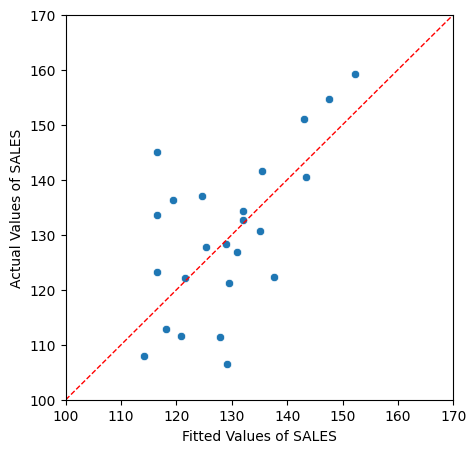

In [24]:
# Create a scatter plot between the fitted and actual values of 'SALES'
plt.figure(figsize = (5, 5))
sns.scatterplot(x = lr_model_3.fittedvalues, y = df['SALES'])
plt.axline((100,100), slope = 1, linestyle = '--', linewidth = 1, color = 'r')
plt.xlim((100, 170))
plt.ylim((100, 170))
plt.xlabel('Fitted Values of SALES')
plt.ylabel('Actual Values of SALES');

If the predicted values are close to the actual values, then all the points should lie close to the diagonal line.

## Fitted Values vs Residuals

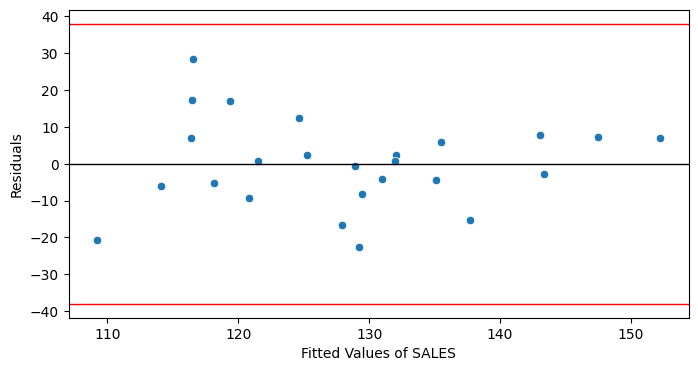

In [25]:
# Create a scatter plot between the fitted values of 'SALES' and the residuals
plt.figure(figsize = (8, 4))
sns.scatterplot(x = lr_model_3.fittedvalues, y = lr_model_3.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'k')
plt.axhline(y = 3 * rse_3, xmin = 0, xmax = 1, linewidth = 1, color = 'r')
plt.axhline(y = -3 * rse_3, xmin = 0, xmax = 1, linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of SALES')
plt.ylabel('Residuals');

The plot should look like a patternless cloud, otherwise it indicates possible violations of the assumptions of linear regression and/or the existence of some unknown predictors that may not have not been accounted for in the model. Also note that if some residual points lie outside the 3 x SE lines on either side, then they could be declared as outliers.

## Histogram of Residuals

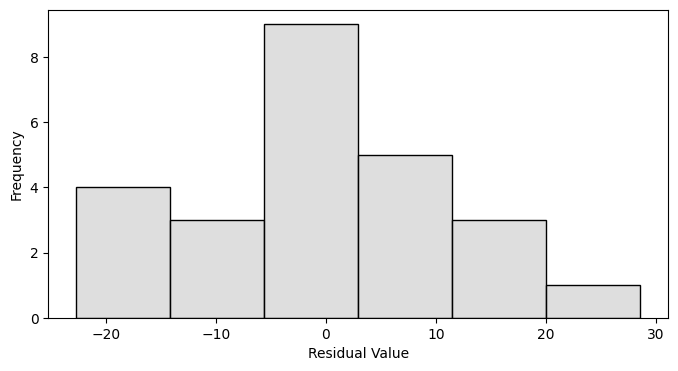

In [26]:
# Create a histogram of the residuals
plt.figure(figsize = (8, 4))
sns.histplot(data = df, x = lr_model_3.resid, color = 'lightgray')
plt.xlabel('Residual Value')
plt.ylabel('Frequency');

The distribution of residuals looks somewhat normal according to this histogram.

## QQ Plot

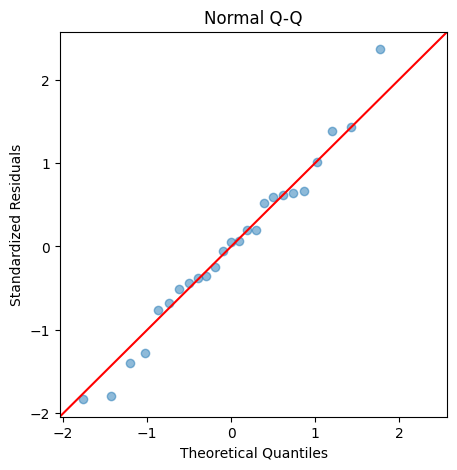

In [29]:
# Create a QQ plot for the data
QQ = ProbPlot(lr_model_3.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(5, 5)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');

All the points should lie on the diagonal line. Any departure from the diagonal line indicates a departure from the assumption of normality.